<a href="https://colab.research.google.com/github/pawan070bct27/Computer-vision/blob/master/SVM_CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
label_xy = np.load('train_label_xy.npy')

In [ ]:
data_xy = np.load('train_xy.npy')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(data_xy)
pca.explained_variance_ratio_

array([3.57339124e-01, 1.42144324e-01, 1.28344032e-01, ...,
       2.14172089e-18, 7.75055074e-19, 7.04727162e-32])

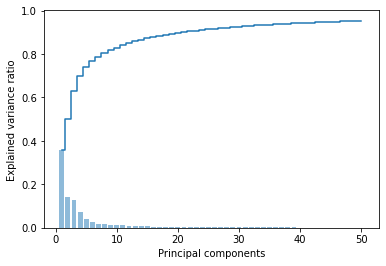

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(1, 51), pca.explained_variance_ratio_[:50], alpha=0.5, align='center')
plt.step(range(1, 51), np.cumsum(pca.explained_variance_ratio_)[:50], where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [ ]:
X_pca_new = X_pca[:,:6]
X_pca_new.shape

(1002, 6)

In [ ]:
X_pca_new = X_pca_new.reshape(167,6,6)
label_xy = label_xy.reshape(167,6,)

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_pca_new, label_xy, test_size=0.3,random_state=109) # 70% training and 30% test


In [ ]:
X_train = X_train.reshape(X_train.shape[0]*6, 6)
y_train = y_train.reshape(y_train.shape[0]*6,)

X_test = X_test.reshape(X_test.shape[0]*6, 6)
y_test = y_test.reshape(y_test.shape[0]*6,)

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6339869281045751


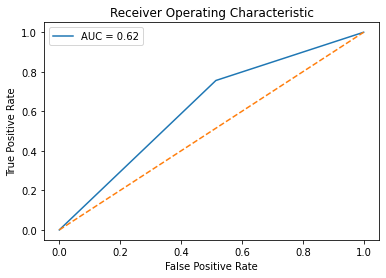

In [ ]:
import matplotlib.pyplot as plt

# predict probabilities for X_test using predict_proba
probabilities = clf.predict(X_test)

# select the probabilities for label 1.0
y_proba = probabilities

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');